<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Actividad_3_6_Regresion_NO_Lineal_M%C3%A1laga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión NO lineal

## Actividad 3.6


## 1.   **Importamos librerías y leemos archivo**


In [1]:
%pip install scipy

In [2]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [4]:
data=pd.read_csv('FINAL_MALAGA.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,clave_ciudad
0,Carlos Alberto,2021-09-13,"Málaga, Spain",within an hour,1.0,1.00,t,Conjunto Residencial Playa las Gaviotas Fase VI,"['email', 'phone']",t,...,4.89,4.93,4.97,4.97,4.96,4.85,4.74,2.0,4.44,MALAGA
1,Rodo,2022-02-24,"Málaga, Spain",within an hour,1.0,1.00,f,Conjunto Residencial Playa las Gaviotas Fase VI,"['email', 'phone']",t,...,4.83,4.94,4.94,4.61,4.83,4.83,4.83,1.0,1.30,MALAGA
2,Lu&Cia,2017-04-18,"Málaga, Spain",within an hour,1.0,1.00,f,Conjunto Residencial Playa las Gaviotas Fase VI,"['email', 'phone', 'work_email']",t,...,4.62,4.81,4.46,4.81,4.92,4.85,4.65,43.0,0.39,MALAGA
3,Gestitur,2021-05-04,"Málaga, Spain",within an hour,1.0,0.99,f,Conjunto Residencial Playa las Gaviotas Fase VI,"['email', 'phone']",t,...,5.00,5.00,5.00,5.00,5.00,5.00,4.67,17.0,1.73,MALAGA
4,Maria,2021-10-19,"Málaga, Spain",within an hour,1.0,1.00,f,Conjunto Residencial Playa las Gaviotas Fase VI,"['email', 'phone']",t,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,7.0,0.16,MALAGA


##2.   **Realiza** las acciones de preprocesamiento necesarias: **Nulos y Outliers**



In [5]:
print('Total de valores nulos dentro del DF:  ',data.isnull().sum().sum())

Total de valores nulos dentro del DF:   0


In [6]:
#Se crea una copia del frame original
data_copia = data.copy()

In [7]:
#Se detectan los valores unicos de la columna
np.unique(data_copia['host_is_superhost'])

array(['f', 't'], dtype=object)

In [8]:
#Se reemplazan los datos categoricos a numerico
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].replace('f',0)
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].replace('t',1)
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].astype(int)

<ipython-input-8-296a0b2b9cf9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copia['host_is_superhost'] = data_copia['host_is_superhost'].replace('t',1)


In [9]:
#Se detectan los valores unicos de la columna
np.unique(data_copia['room_type'])

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [10]:
#Se reemplazan los datos categoricos a numerico
data_copia['room_type'] = data_copia['room_type'].replace('Entire home/apt',1)
data_copia['room_type'] = data_copia['room_type'].replace('Hotel room',2)
data_copia['room_type'] = data_copia['room_type'].replace('Private room',3)
data_copia['room_type'] = data_copia['room_type'].replace('Shared room',4)
data_copia['room_type'] = data_copia['room_type'].astype(int)

<ipython-input-10-09f6cc314ba6>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copia['room_type'] = data_copia['room_type'].replace('Shared room',4)


In [11]:
#Se eliminan columnas innecesarias
data_evaluar = data_copia.select_dtypes(include=[int, float])
data_evaluar.head(3)

,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,price,id,host_id,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,1.0,1.0,1,1,114.4,52295523,422798059,3.0,3.0,36.724230,...,9.1,4.89,4.93,4.97,4.97,4.96,4.85,4.74,2.0,4.44
1,1.0,1.0,0,1,88.0,1105849600091052946,446668777,1.0,1.0,36.723985,...,18.0,4.83,4.94,4.94,4.61,4.83,4.83,4.83,1.0,1.30
2,1.0,1.0,0,1,133.1,31748629,126386697,44.0,51.0,36.714190,...,6.0,4.62,4.81,4.46,4.81,4.92,4.85,4.65,43.0,0.39


##3.  **Crear Modelos**

En primer lugar, para facilitar la busqueda de variables que sirvan correctamente como variables independientes para cada modelo se utiliza un 'heat map' el cuál nos muestre las variables con la mejor correlación.

In [12]:
#Encontramos todos los coeficientes de correlacion entre las variables
corr_factors = data_evaluar.corr()
#Encontramos el valor absoluto de todas las correlaciones entre las variables
corr_factors1 = abs(corr_factors)

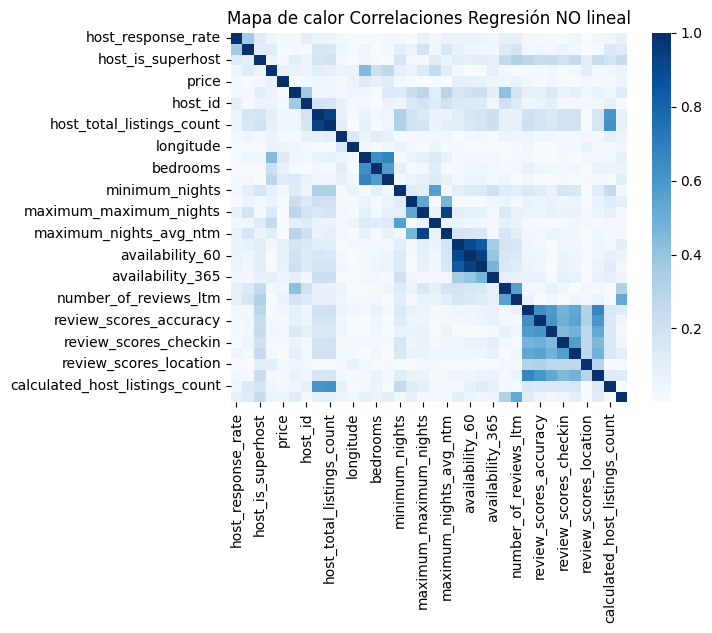

In [13]:
#Ajustemos el mapa del calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corr_factors1, cmap='Blues')
Heat_Map
plt.title('Mapa de calor Correlaciones Regresión NO lineal')
plt.show()

##  4. **Elegir** 2 modelos de correlación No lineal y **Analizar** la correlación que existe entre las siguientes variables:

1. **host_response_rate** (variable objetivo)
2. **host_acceptance_rate** (variable objetivo)
3. **host_total_listings_count** (variable objetivo)
4. **accommodates** (variable objetivo)
5. **reviews_per_month** (variable objetivo)
6. **price**(variable objetivo)



### host_response_rate

In [14]:
a=corr_factors1.sort_values(by='host_response_rate', ascending=False).head(7)
a.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,price,id,host_id,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_response_rate,1.000000,0.368690,0.118953,0.051154,0.020425,0.023831,0.101331,0.055853,0.055212,0.026344,...,0.096426,0.032612,0.021092,0.018138,0.009921,0.049129,0.001374,0.029917,0.048213,0.079786
host_acceptance_rate,0.368690,1.000000,0.102737,0.120974,0.011016,0.021489,0.015460,0.171908,0.154837,0.046585,...,0.172431,0.032816,0.036898,0.030573,0.057330,0.027567,0.000076,0.015211,0.144444,0.124513
host_is_superhost,0.118953,0.102737,1.000000,0.057843,0.027107,0.108749,0.059864,0.182584,0.201048,0.019642,...,0.318517,0.281324,0.237691,0.239348,0.201904,0.253286,0.099469,0.236400,0.182827,0.239094
host_id,0.101331,0.015460,0.059864,0.053625,0.020043,0.371302,1.000000,0.188540,0.182958,0.075568,...,0.130204,0.043323,0.057698,0.096214,0.034015,0.027530,0.032374,0.035285,0.088803,0.014748
number_of_reviews_ltm,0.096426,0.172431,0.318517,0.009211,0.067069,0.184456,0.130204,0.078666,0.085880,0.047255,...,1.000000,0.073444,0.004086,0.039456,0.011699,0.040199,0.017401,0.059603,0.007103,0.526111


In [15]:
#Variable Independiente
a1=a.index[1]
a1

'host_acceptance_rate'

In [16]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_1 = data_evaluar[a1]
var_dep_1 = data_evaluar['host_response_rate']

In [17]:
x=vars_indep_1
y=var_dep_1

### Modelos

#### Modelo 1:

            y = ax^2 + bx + c   ("Función cuadrática")

In [18]:
def  func1 (x, a, b, c):
     return a * np.square(x) + b * x + c

In [19]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1 , vars_indep_1, var_dep_1)

In [20]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-0.18755515,  0.49809686,  0.67114468])

In [21]:
# Predicciones
y_pred1 = func1(x, *parametros1)
y_pred1.head()

,host_acceptance_rate
0,0.981686
1,0.981686
2,0.981686
3,0.980438
4,0.981686


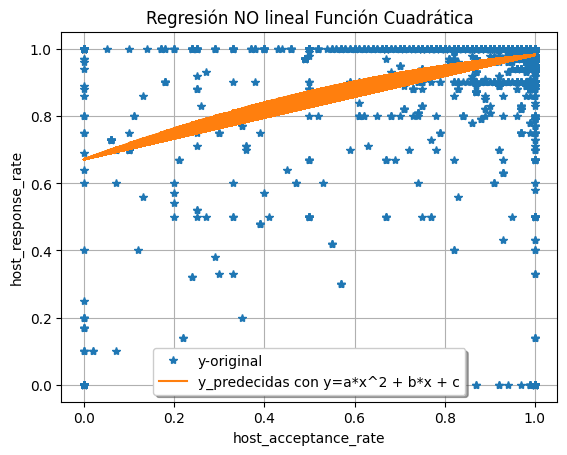

In [22]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred1, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [23]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1= r2_score(y,y_pred1)
R2_Modelo1

0.141090349477908

In [24]:
#Calculamos el coeficiente de correlacion del modelo
R_1=np.sqrt(R2_Modelo1)
R_1

0.3756199535140645

#### Modelo 2:
            y = a*exp(-bx) + c   ("Función exponencial")


In [25]:
def  func2 (x, a, b, c):
     return a * np.exp(-b * x) + c

In [26]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2 , vars_indep_1, var_dep_1)
# Predicciones
y_pred2 = func2(x, *parametros2)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2= r2_score(y,y_pred2)
#Calculamos el coeficiente de correlacion del modelo
R_2=np.sqrt(R2_Modelo2)

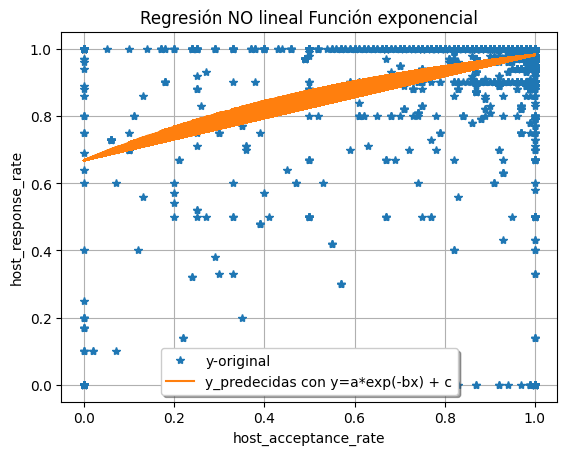

In [27]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred2, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 3:

           y = 1/a*x           ("Función inversa")


In [28]:
def  func3 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros3, covs3= curve_fit(func3 , vars_indep_1, var_dep_1)
# Predicciones
y_pred3 = func3(x, *parametros3)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo3= r2_score(y,y_pred3)
#Calculamos el coeficiente de correlacion del modelo
R_3=np.sqrt(R2_Modelo3)

<ipython-input-28-997376f21c0c>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros3, covs3= curve_fit(func3 , vars_indep_1, var_dep_1)
<ipython-input-28-997376f21c0c>:11: RuntimeWarning: invalid value encountered in sqrt
  R_3=np.sqrt(R2_Modelo3)


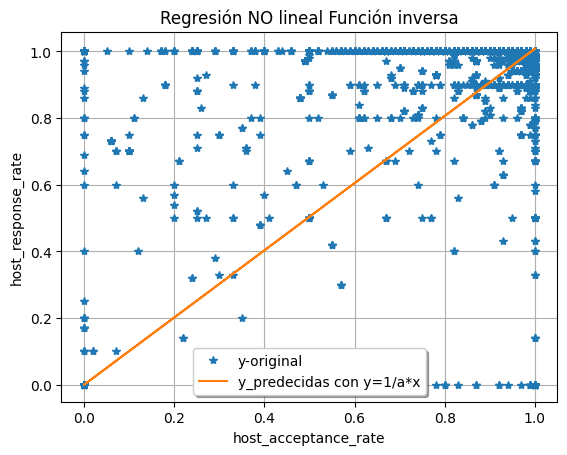

In [29]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred3, label='y_predecidas con y=1/a*x')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

            y = a*np.sin(x) + b ("Función senoidal")


In [30]:
def  func4 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros4, covs4= curve_fit(func4 , vars_indep_1, var_dep_1)
# Predicciones
y_pred4 = func4(x, *parametros4)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo4= r2_score(y,y_pred4)
#Calculamos el coeficiente de correlacion del modelo
R_4=np.sqrt(R2_Modelo4)

<ipython-input-30-758dc1cdbdf0>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros4, covs4= curve_fit(func4 , vars_indep_1, var_dep_1)


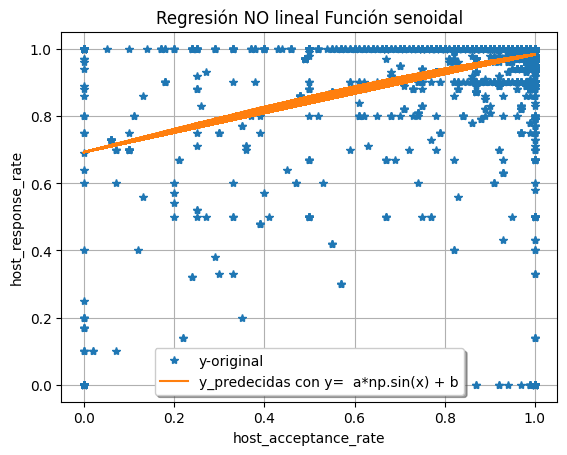

In [31]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred4, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:
            y = a*np.tan(x) + b ("Función tangencial")


In [32]:
def  func5 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros5, covs= curve_fit(func5 , vars_indep_1, var_dep_1)
# Predicciones
y_pred5 = func5(x, *parametros5)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo5= r2_score(y,y_pred5)
#Calculamos el coeficiente de correlacion del modelo
R_5=np.sqrt(R2_Modelo5)

<ipython-input-32-f4c1765bbc74>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros5, covs= curve_fit(func5 , vars_indep_1, var_dep_1)


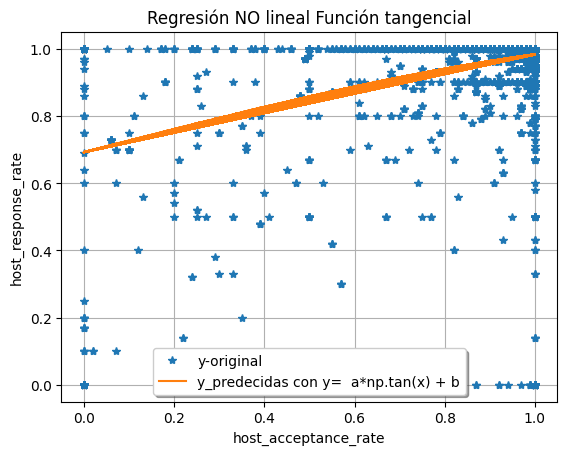

In [33]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred5, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:
            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

In [34]:
def  func6 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros6, covs6= curve_fit(func6 , vars_indep_1, var_dep_1)
# Predicciones
y_pred6 = func6(x, *parametros6)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6= r2_score(y,y_pred6)
#Calculamos el coeficiente de correlacion del modelo
R_6=np.sqrt(R2_Modelo6)

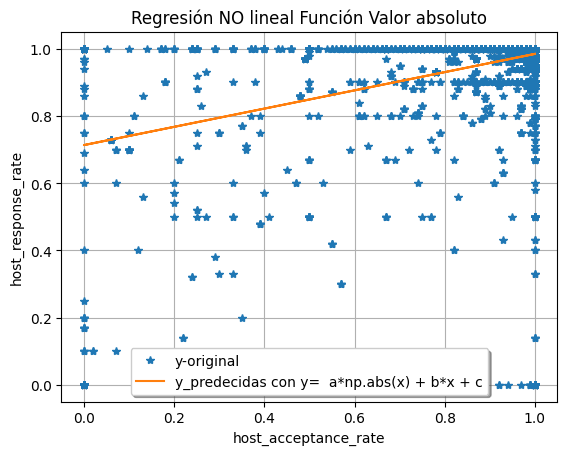

In [35]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred6, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

<ipython-input-36-f942e988e2ab>:11: RuntimeWarning: invalid value encountered in sqrt
  R_7=np.sqrt(R2_Modelo7)


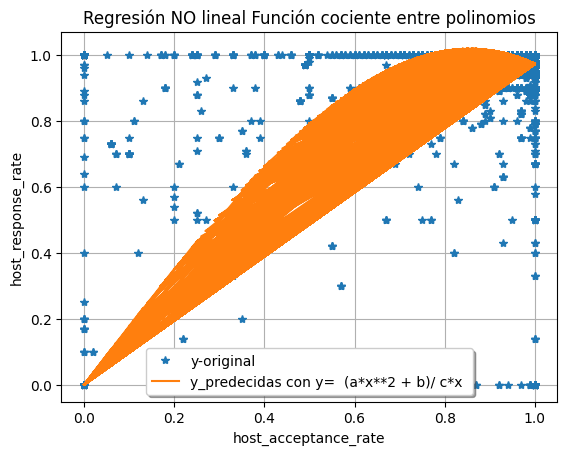

In [36]:
def  func7 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros7, covs7= curve_fit(func7 , vars_indep_1, var_dep_1)
# Predicciones
y_pred7 = func7(x, *parametros7)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo7= r2_score(y,y_pred7)
#Calculamos el coeficiente de correlacion del modelo
R_7=np.sqrt(R2_Modelo7)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred7, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:
            y = a*np.log(x) + b  (Función logaritmica)


In [37]:
def  func8 (x, a, b):
  print(min(np.log(abs(x))))
  return a*np.log(abs(x)) + b

#Ajustamos los parámetros de la función curve_fit
parametros8, covs8= curve_fit(func8 , vars_indep_1, var_dep_1)
print(parametros8)
# Predicciones
y_pred8 = func8(x, *parametros8)
#Calculamos el coeficiente de determinación del modelo

R2_Modelo8= r2_score(y,y_pred8)
#Calculamos el coeficiente de correlacion del modelo
R_8=np.sqrt(R2_Modelo8)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred8, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-37-9677752f8f69>:6: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros8, covs8= curve_fit(func8 , vars_indep_1, var_dep_1)


-inf
-inf
-inf
[1. 1.]
-inf


ValueError: Input contains infinity or a value too large for dtype('float64').

#### Modelo 9:

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)


<ipython-input-38-a3e69639b31d>:11: RuntimeWarning: invalid value encountered in sqrt
  R_9=np.sqrt(R2_Modelo9)


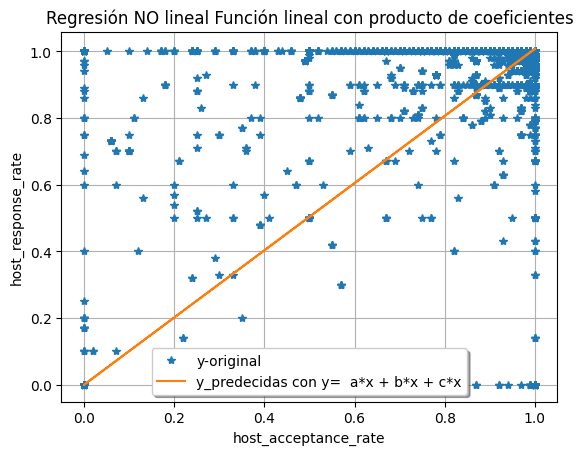

In [38]:
def  func9 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros9, covs8= curve_fit(func9 , vars_indep_1, var_dep_1)
# Predicciones
y_pred9 = func9(x, *parametros9)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo9= r2_score(y,y_pred9)
#Calculamos el coeficiente de correlacion del modelo
R_9=np.sqrt(R2_Modelo9)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred9, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:


            y = 1/a*x**2  (Función cuadrática inversa)


<ipython-input-39-c725e0028b91>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros10, covs10= curve_fit(func10 , vars_indep_1, var_dep_1)
<ipython-input-39-c725e0028b91>:11: RuntimeWarning: invalid value encountered in sqrt
  R_10=np.sqrt(R2_Modelo10)


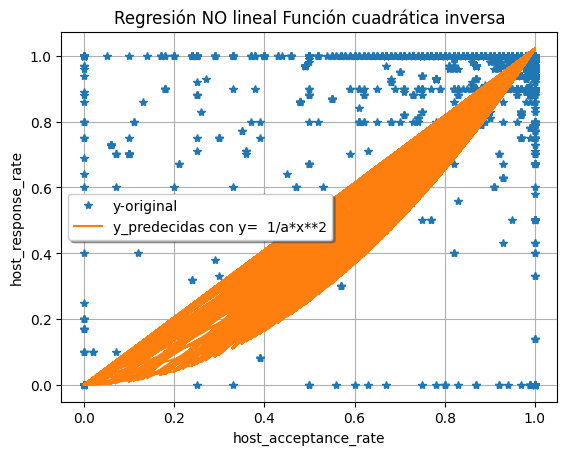

In [39]:
def  func10 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros10, covs10= curve_fit(func10 , vars_indep_1, var_dep_1)
# Predicciones
y_pred10 = func10(x, *parametros10)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo10= r2_score(y,y_pred10)
#Calculamos el coeficiente de correlacion del modelo
R_10=np.sqrt(R2_Modelo10)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred10, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

            y = a/b*x**2 + c*x (Función polinomial inversa)



<ipython-input-40-6b5ffe2ef8f3>:11: RuntimeWarning: invalid value encountered in sqrt
  R_11=np.sqrt(R2_Modelo11)


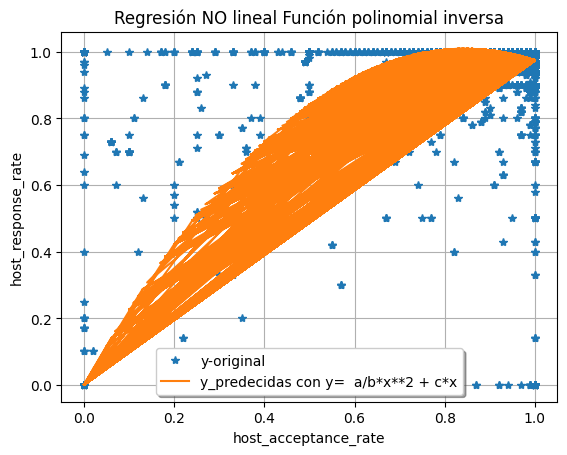

In [40]:
def  func11 (x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros11, covs11= curve_fit(func11, vars_indep_1, var_dep_1)
# Predicciones
y_pred11 = func11(x, *parametros11)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo11= r2_score(y,y_pred11)
#Calculamos el coeficiente de correlacion del modelo
R_11=np.sqrt(R2_Modelo11)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred11, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('host_acceptance_rate')
plt.ylabel('host_response_rate')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES HOST RESPONSE RATE

In [43]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo1, R2_Modelo2,R2_Modelo3,R2_Modelo4,R2_Modelo5,R2_Modelo6,R2_Modelo7,R2_Modelo9,R2_Modelo10,R2_Modelo11],
    'Coeficiente de Correlación': [R_1, R_2,R_3,R_4,R_5,R_6,R_7,R_9,R_10,R_11]
}

# Generar con llaves
df_coef_mult1 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult1 = df_coef_mult1.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult1)
print('\nMejor Modelo:\n', df_coef_mult1.iloc[0])

Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 2: Función Exponencial                                           0.141106   
Modelo 1: Función Cuadrática                                            0.141090   
Modelo 4: Función senoidal                                              0.139641   
Modelo 5: Función tangencial                                            0.139641   
Modelo 6: Función Valor absoluto                                        0.135932   
Modelo 11: Función polinomial inversa                                  -0.396380   
Modelo 7: Función cociente entre polinomios                            -0.451258   
Modelo 3: Función inversa                                              -0.898084   
Modelo 9: Función lineal con producto de coefic...                     -0.898084   
Modelo 10: Función cuadrática inversa                                  -1.888113   

         

### host_acceptance_rate

In [44]:
a1=corr_factors1.sort_values(by='host_acceptance_rate', ascending=False).head(7)
a1.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,price,id,host_id,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_acceptance_rate,0.368690,1.000000,0.102737,0.120974,0.011016,0.021489,0.015460,0.171908,0.154837,0.046585,...,0.172431,0.032816,0.036898,0.030573,0.057330,0.027567,0.000076,0.015211,0.144444,0.124513
host_response_rate,1.000000,0.368690,0.118953,0.051154,0.020425,0.023831,0.101331,0.055853,0.055212,0.026344,...,0.096426,0.032612,0.021092,0.018138,0.009921,0.049129,0.001374,0.029917,0.048213,0.079786
maximum_maximum_nights,0.074653,0.190147,0.022444,0.137148,0.002229,0.282838,0.188787,0.147882,0.178688,0.029869,...,0.074027,0.059850,0.051463,0.076166,0.067332,0.066387,0.022231,0.060526,0.093304,0.021553
number_of_reviews_ltm,0.096426,0.172431,0.318517,0.009211,0.067069,0.184456,0.130204,0.078666,0.085880,0.047255,...,1.000000,0.073444,0.004086,0.039456,0.011699,0.040199,0.017401,0.059603,0.007103,0.526111
host_listings_count,0.055853,0.171908,0.182584,0.098726,0.038381,0.049986,0.188540,1.000000,0.936022,0.085705,...,0.078666,0.204424,0.178985,0.145431,0.194905,0.197732,0.004345,0.175783,0.609355,0.087342


In [45]:
#Variable Independiente
a2=a1.index[1]
a2

'host_response_rate'

In [46]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_2 = data_evaluar[a2]
var_dep_2 = data_evaluar['host_acceptance_rate']

In [146]:
x=vars_indep_2
y=var_dep_2

### Modelos:

#### Modelo 1:

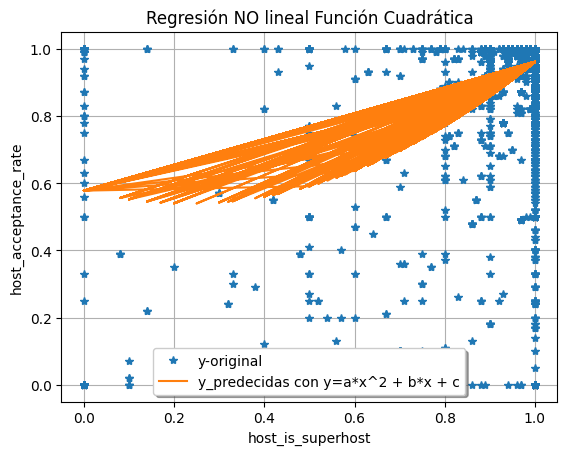

In [147]:
def  func12 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros12, covs= curve_fit(func12 , vars_indep_2, var_dep_2)
# Predicciones
y_pred12 = func12(x, *parametros12)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo12= r2_score(y,y_pred12)
#Calculamos el coeficiente de correlacion del modelo
R_12=np.sqrt(R2_Modelo12)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred12, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2:

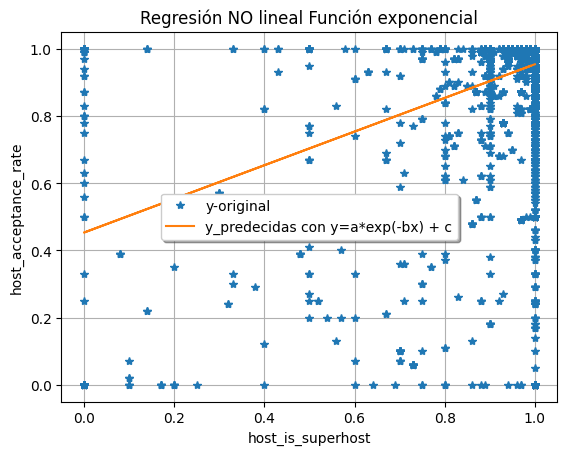

In [148]:
def  func22 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros22, covs= curve_fit(func22 , vars_indep_2, var_dep_2,maxfev = 8000)
# Predicciones
y_pred22 = func22(x, *parametros22)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo22= r2_score(y,y_pred22)
#Calculamos el coeficiente de correlacion del modelo
R_22=np.sqrt(R2_Modelo22)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred22, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


#### Modelo 3

<ipython-input-149-6330766c4816>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros32, covs3= curve_fit(func32 , vars_indep_2, var_dep_2)


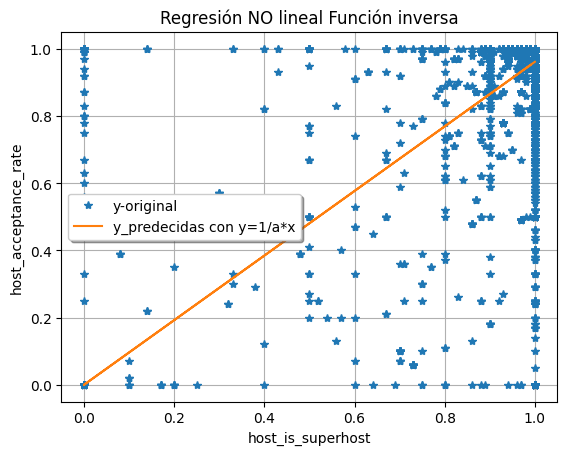

In [149]:
def  func32 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros32, covs3= curve_fit(func32 , vars_indep_2, var_dep_2)
# Predicciones
y_pred32 = func32(x, *parametros32)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo32= r2_score(y,y_pred32)
#Calculamos el coeficiente de correlacion del modelo
R_32=np.sqrt(R2_Modelo32)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred32, label='y_predecidas con y=1/a*x')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4

<ipython-input-150-ae52d34afe66>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros42, covs4= curve_fit(func42 , vars_indep_2, var_dep_2)


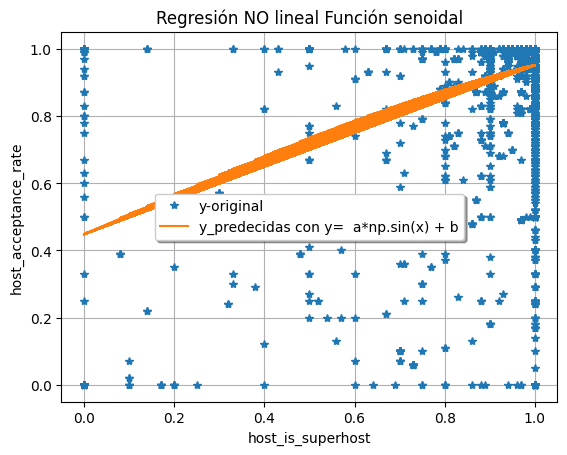

In [150]:
def  func42 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros42, covs4= curve_fit(func42 , vars_indep_2, var_dep_2)
# Predicciones
y_pred42 = func42(x, *parametros42)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo42= r2_score(y,y_pred42)
#Calculamos el coeficiente de correlacion del modelo
R_42=np.sqrt(R2_Modelo42)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred42, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5

<ipython-input-151-44526ae8248f>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros52, covs= curve_fit(func52 , vars_indep_2, var_dep_2)


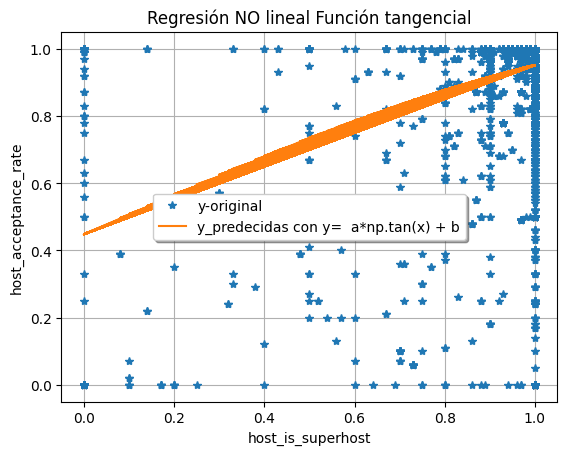

In [151]:
def  func52 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros52, covs= curve_fit(func52 , vars_indep_2, var_dep_2)
# Predicciones
y_pred52 = func52(x, *parametros52)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo52= r2_score(y,y_pred52)
#Calculamos el coeficiente de correlacion del modelo
R_52=np.sqrt(R2_Modelo52)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred52, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6

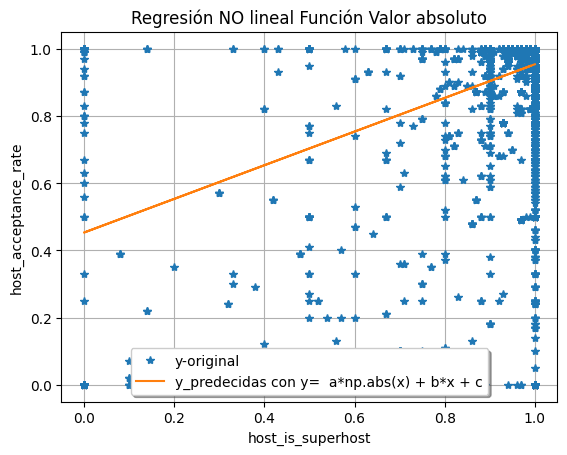

In [152]:
def  func62 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros62, covs62= curve_fit(func62 , vars_indep_2, var_dep_2)
# Predicciones
y_pred62 = func62(x, *parametros62)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo62= r2_score(y,y_pred62)
#Calculamos el coeficiente de correlacion del modelo
R_62=np.sqrt(R2_Modelo62)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred62, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7

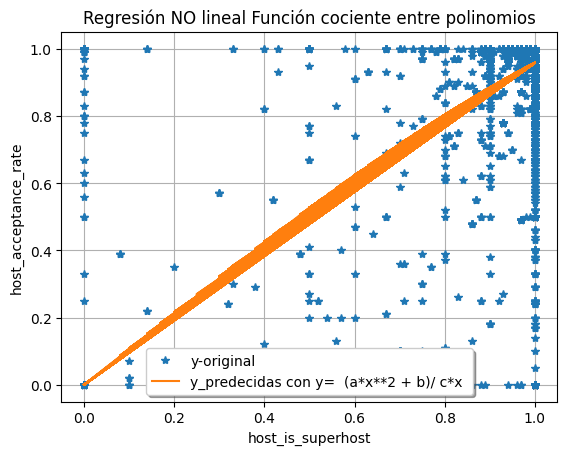

In [153]:
def  func72 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros72, covs72= curve_fit(func72 , vars_indep_2, var_dep_2)
# Predicciones
y_pred72 = func72(x, *parametros72)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo72= r2_score(y,y_pred72)
#Calculamos el coeficiente de correlacion del modelo
R_72=np.sqrt(R2_Modelo72)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred72, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8

In [154]:
def  func82 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros82, covs82= curve_fit(func82 , vars_indep_2, var_dep_2)
# Predicciones
y_pred82 = func82(x, *parametros82)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo82= r2_score(y,y_pred82)
#Calculamos el coeficiente de correlacion del modelo
R_82=np.sqrt(R2_Modelo82)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred82, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-154-dbdee1efc3f4>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros82, covs82= curve_fit(func82 , vars_indep_2, var_dep_2)


ValueError: Input contains infinity or a value too large for dtype('float64').

#### Modelo 9

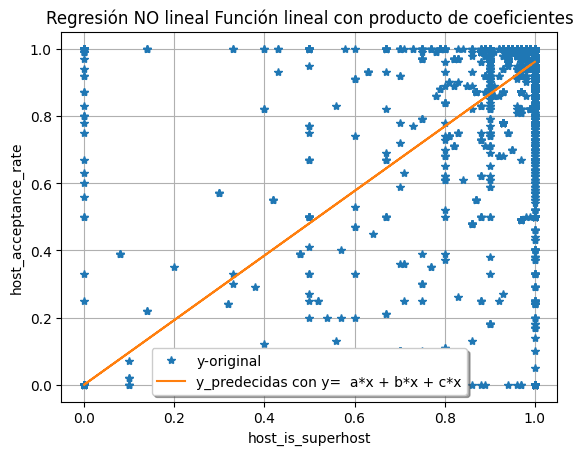

In [155]:
def  func92 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros92, covs92= curve_fit(func92 , vars_indep_2, var_dep_2)
# Predicciones
y_pred92 = func92(x, *parametros92)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo92= r2_score(y,y_pred92)
#Calculamos el coeficiente de correlacion del modelo
R_92=np.sqrt(R2_Modelo92)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred92, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10

<ipython-input-159-0249d9374db0>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros102, covs102= curve_fit(func102 , vars_indep_2, var_dep_2)


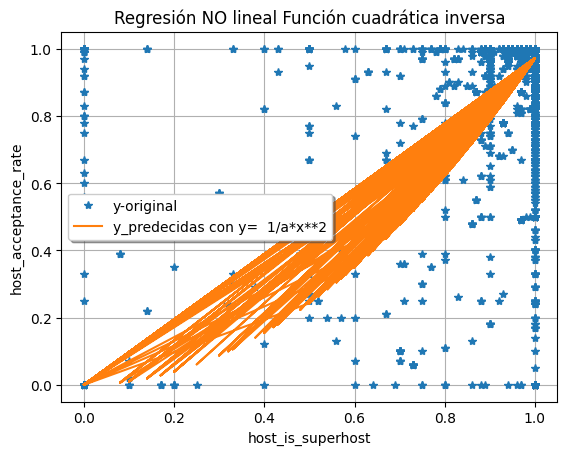

In [159]:
def  func102 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros102, covs102= curve_fit(func102 , vars_indep_2, var_dep_2)
# Predicciones
y_pred102 = func102(x, *parametros102)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo102= r2_score(y,y_pred102)
#Calculamos el coeficiente de correlacion del modelo
R_102=np.sqrt(abs(R2_Modelo102))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred102, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11

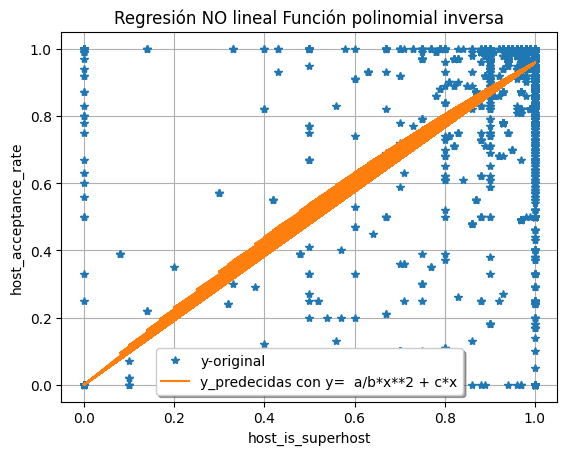

In [160]:
def  func112 (x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros112, covs112= curve_fit(func112, vars_indep_2, var_dep_2)
# Predicciones
y_pred112 = func112(x, *parametros112)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo112= r2_score(y,y_pred112)
#Calculamos el coeficiente de correlacion del modelo
R_112=np.sqrt(R2_Modelo112)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred112, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('host_is_superhost')
plt.ylabel('host_acceptance_rate')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES host_acceptance_rate

In [161]:
# Preparar datos del Frame
coef_data2 = {
    'Coeficiente de Determinación': [R2_Modelo12, R2_Modelo32, R2_Modelo42, R2_Modelo52, R2_Modelo62, R2_Modelo72, R2_Modelo92, R2_Modelo102, R2_Modelo112],
    'Coeficiente de Correlación': [R_12, R_32, R_42, R_52, R_62, R_72, R_92, R_102, R_112]
}

# Generar con llaves
df_coef_mult2 = pd.DataFrame(coef_data2, index=['Modelo 1: Función Cuadrática','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult2 = df_coef_mult2.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult2)
print('\nMejor Modelo:\n', df_coef_mult2.iloc[0])

Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                            0.157954   
Modelo 6: Función Valor absoluto                                        0.135932   
Modelo 4: Función senoidal                                              0.125345   
Modelo 5: Función tangencial                                            0.125345   
Modelo 11: Función polinomial inversa                                   0.022531   
Modelo 7: Función cociente entre polinomios                             0.022117   
Modelo 9: Función lineal con producto de coefic...                      0.019205   
Modelo 3: Función inversa                                               0.019205   
Modelo 10: Función cuadrática inversa                                  -0.065692   

                                                    Coeficiente de Correlación  
Modelo 1: Fu

### host_total_listings_count

In [162]:
a=corr_factors1.sort_values(by='host_total_listings_count', ascending=False).head(7)
a.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,price,id,host_id,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_total_listings_count,0.055212,0.154837,0.201048,0.082341,0.036593,0.047562,0.182958,0.936022,1.000000,0.099260,...,0.085880,0.210462,0.182938,0.154560,0.200117,0.200643,0.005229,0.174591,0.620703,0.088462
host_listings_count,0.055853,0.171908,0.182584,0.098726,0.038381,0.049986,0.188540,1.000000,0.936022,0.085705,...,0.078666,0.204424,0.178985,0.145431,0.194905,0.197732,0.004345,0.175783,0.609355,0.087342
calculated_host_listings_count,0.048213,0.144444,0.182827,0.036147,0.024809,0.044218,0.088803,0.609355,0.620703,0.088121,...,0.007103,0.158753,0.141062,0.142454,0.148629,0.157957,0.001668,0.132199,1.000000,0.006439
minimum_nights,0.021982,0.099607,0.176057,0.090183,0.030035,0.125124,0.049104,0.325147,0.319908,0.018317,...,0.109486,0.143977,0.119710,0.070762,0.173470,0.159012,0.005241,0.121431,0.257120,0.031267
review_scores_rating,0.032612,0.032816,0.281324,0.010812,0.029699,0.088619,0.043323,0.204424,0.210462,0.053452,...,0.073444,1.000000,0.633554,0.582387,0.473995,0.532359,0.306754,0.669409,0.158753,0.121253


In [163]:
#Variable Independiente
a2=a.index[1]
a2

'host_listings_count'

In [164]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_evaluar[a2]
var_dep_3 = data_evaluar['host_total_listings_count']

In [165]:
x=vars_indep_3
y=var_dep_3

### Modelos:

#### Modelo 1:

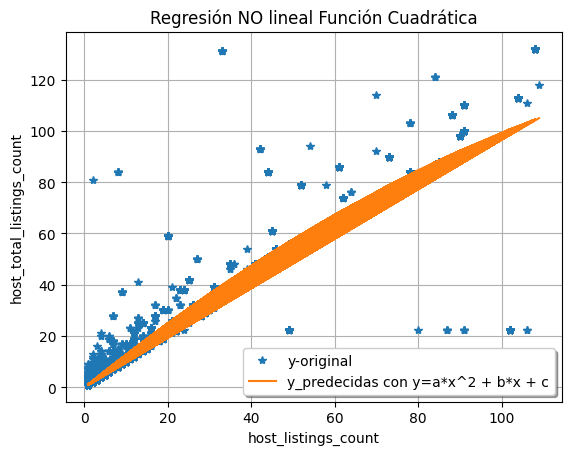

In [166]:
def  func13 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros13, covs= curve_fit(func13 , vars_indep_3, var_dep_3)
# Predicciones
y_pred13 = func13(x, *parametros13)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo13= r2_score(y,y_pred13)
#Calculamos el coeficiente de correlacion del modelo
R_13=np.sqrt(R2_Modelo13)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred13, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 2:

<ipython-input-178-835e876a131c>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3)


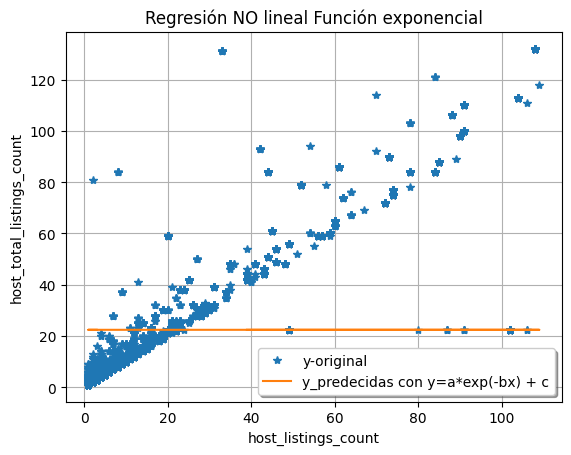

In [178]:
def  func23 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3)
# Predicciones
y_pred23 = func23(x, *parametros23)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo23= r2_score(y,y_pred23)
#Calculamos el coeficiente de correlacion del modelo
R_23=np.sqrt(abs(R2_Modelo23))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred23, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()


#### Modelo 3:

<ipython-input-179-efc386f4e5b5>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)


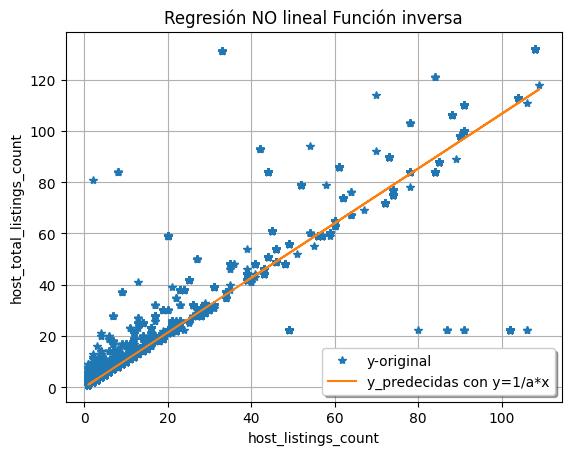

In [179]:
def  func33 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)
# Predicciones
y_pred33 = func33(x, *parametros33)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo33= r2_score(y,y_pred33)
#Calculamos el coeficiente de correlacion del modelo
R_33=np.sqrt(R2_Modelo33)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred33, label='y_predecidas con y=1/a*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 4:

<ipython-input-180-065bcbecb521>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)


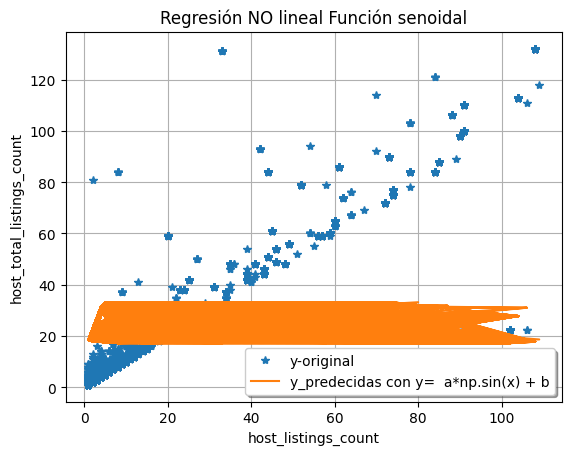

In [180]:
def  func43 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)
# Predicciones
y_pred43 = func43(x, *parametros43)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo43= r2_score(y,y_pred43)
#Calculamos el coeficiente de correlacion del modelo
R_43=np.sqrt(R2_Modelo43)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred43, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 5:

<ipython-input-181-ff95b18c9248>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)


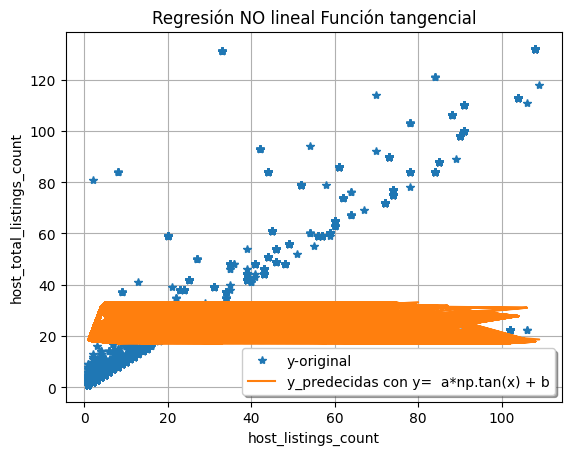

In [181]:
def  func53 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)
# Predicciones
y_pred53 = func53(x, *parametros53)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo53= r2_score(y,y_pred53)
#Calculamos el coeficiente de correlacion del modelo
R_53=np.sqrt(R2_Modelo53)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred53, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 6:

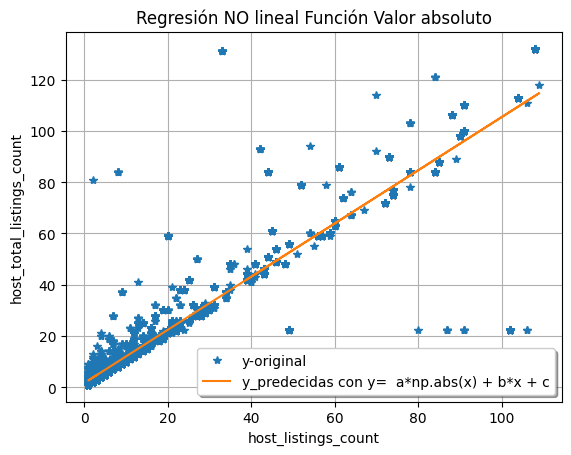

In [182]:
def  func63 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros63, covs63= curve_fit(func63 , vars_indep_3, var_dep_3)
# Predicciones
y_pred63 = func63(x, *parametros63)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo63= r2_score(y,y_pred63)
#Calculamos el coeficiente de correlacion del modelo
R_63=np.sqrt(R2_Modelo63)
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred63, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 7:

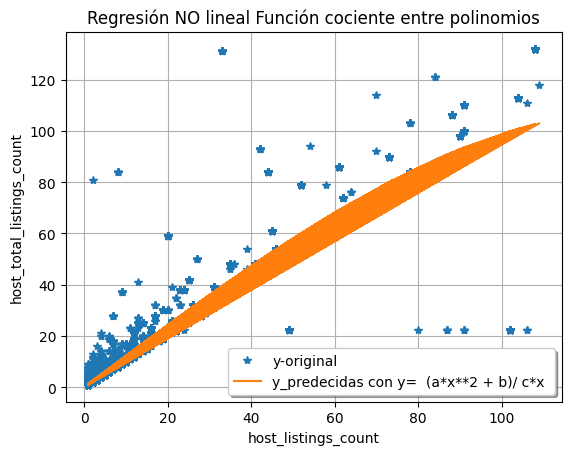

In [183]:
def  func73 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros73, covs73= curve_fit(func73 , vars_indep_3, var_dep_3)
# Predicciones
y_pred73 = func73(x, *parametros73)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo73= r2_score(y,y_pred73)
#Calculamos el coeficiente de correlacion del modelo
R_73=np.sqrt(R2_Modelo73)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred73, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 8:

<ipython-input-184-985b2c7a4040>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)


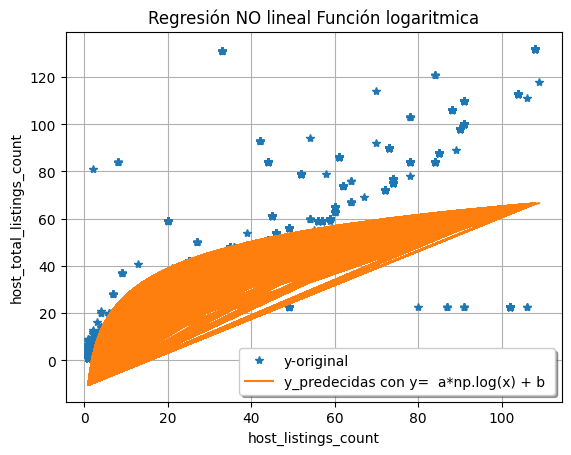

In [184]:
def  func83 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)
# Predicciones
y_pred83 = func83(x, *parametros83)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo83= r2_score(y,y_pred83)
#Calculamos el coeficiente de correlacion del modelo
R_83=np.sqrt(R2_Modelo83)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred83, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 9:

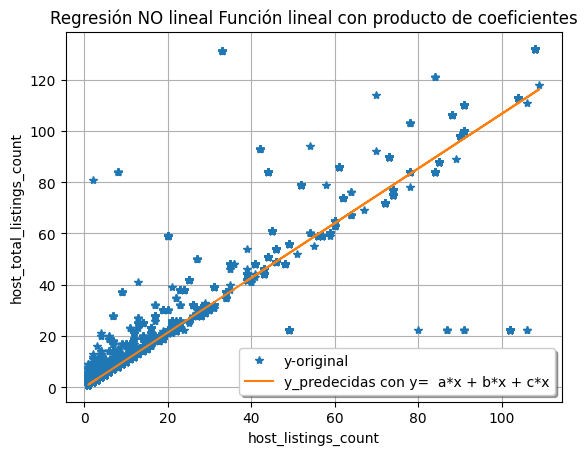

In [185]:
def  func93 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros93, covs93= curve_fit(func93 , vars_indep_3, var_dep_3)
# Predicciones
y_pred93 = func93(x, *parametros93)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo93= r2_score(y,y_pred93)
#Calculamos el coeficiente de correlacion del modelo
R_93=np.sqrt(R2_Modelo93)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred93, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 10:

<ipython-input-186-928b26dc646d>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)


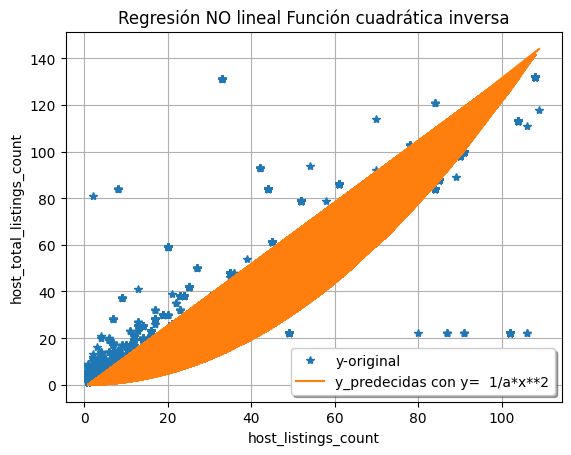

In [186]:
def  func103 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)
# Predicciones
y_pred103 = func103(x, *parametros103)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo103= r2_score(y,y_pred103)
#Calculamos el coeficiente de correlacion del modelo
R_103=np.sqrt(R2_Modelo103)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred103, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### Modelo 11:

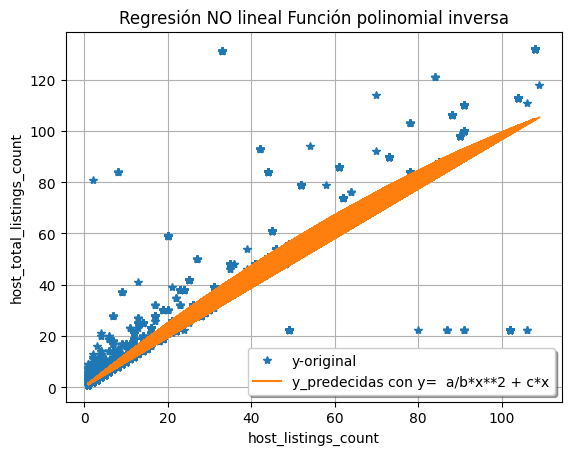

In [187]:
def  func113(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros113, covs113= curve_fit(func113, vars_indep_3, var_dep_3)
# Predicciones
y_pred113 = func113(x, *parametros113)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo113= r2_score(y,y_pred113)
#Calculamos el coeficiente de correlacion del modelo
R_113=np.sqrt(R2_Modelo113)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred113, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES host_total_listings_count

In [189]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo13, R2_Modelo23,R2_Modelo33,R2_Modelo43,R2_Modelo53,R2_Modelo63,R2_Modelo73,R2_Modelo83,R2_Modelo93,R2_Modelo103,R2_Modelo113],
    'Coeficiente de Correlación': [R_13, R_23,R_33,R_43,R_53,R_63,R_73,R_83,R_93,R_103,R_113]
}

# Generar con llaves
df_coef_mult3 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 8: Función Logarítmica','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult3 = df_coef_mult3.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult3)
print('\nMejor Modelo:\n', df_coef_mult3.iloc[0])

Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                        8.826649e-01   
Modelo 7: Función cociente entre polinomios                         8.826331e-01   
Modelo 11: Función polinomial inversa                               8.826206e-01   
Modelo 6: Función Valor absoluto                                    8.761373e-01   
Modelo 3: Función inversa                                           8.741419e-01   
Modelo 9: Función lineal con producto de coefic...                  8.741419e-01   
Modelo 8: Función Logarítmica                                       6.771603e-01   
Modelo 10: Función cuadrática inversa                               6.534585e-01   
Modelo 4: Función senoidal                                          3.247128e-02   
Modelo 5: Función tangencial                                        3.247128e-02   
Modelo 2: 

### accommodates

In [190]:
a=corr_factors1.sort_values(by='accommodates', ascending=False).head(7)
a.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,price,id,host_id,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
accommodates,0.010028,0.050556,0.035403,0.445294,0.127542,0.038199,0.034059,0.066601,0.079202,0.060735,...,0.025858,0.026591,0.009773,0.007002,0.021225,0.003185,0.032091,0.021776,0.029380,0.076907
beds,0.024284,0.027540,0.000511,0.280975,0.121944,0.137614,0.069985,0.044388,0.049642,0.078774,...,0.001239,0.022844,0.001219,0.008923,0.014539,0.004037,0.015057,0.025031,0.011157,0.097772
bedrooms,0.006507,0.011453,0.014885,0.211619,0.085543,0.007969,0.003332,0.029096,0.017972,0.108489,...,0.026500,0.073187,0.044630,0.042482,0.022954,0.038950,0.010331,0.068129,0.055483,0.060397
room_type,0.051154,0.120974,0.057843,1.000000,0.075734,0.068754,0.053625,0.098726,0.082341,0.057354,...,0.009211,0.010812,0.023708,0.036933,0.004005,0.022173,0.097755,0.024032,0.036147,0.055206
minimum_nights_avg_ntm,0.031975,0.042819,0.120089,0.257464,0.006917,0.100756,0.129777,0.068981,0.069367,0.032939,...,0.065290,0.026429,0.012123,0.008373,0.017068,0.037556,0.028358,0.014595,0.023754,0.021965


In [194]:
#Variable Independiente
a3=a.index[1]
a3

'beds'

In [195]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_evaluar[a3]
var_dep_3 = data_evaluar['beds']

In [196]:
x=vars_indep_3
y=var_dep_3

### Modelos:

### Modelo 1:

<ipython-input-197-5d704d6d481b>:4: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros13, covs= curve_fit(func13 , vars_indep_3, var_dep_3)


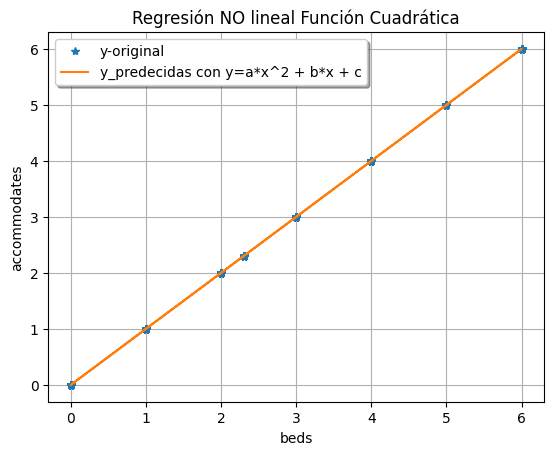

In [197]:
def  func13 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros13, covs= curve_fit(func13 , vars_indep_3, var_dep_3)
# Predicciones
y_pred13 = func13(x, *parametros13)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo13= r2_score(y,y_pred13)
#Calculamos el coeficiente de correlacion del modelo
R_13=np.sqrt(abs(R2_Modelo13))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred13, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 2:

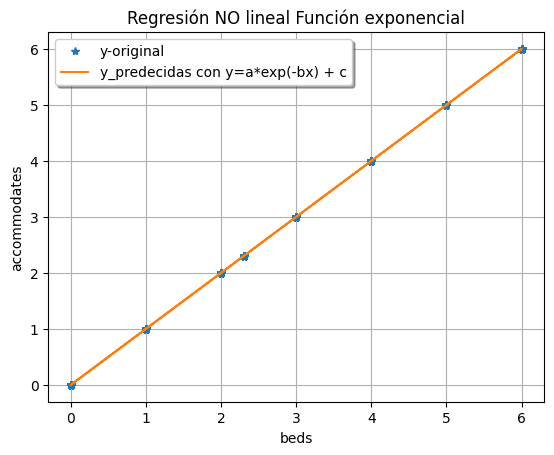

In [198]:
def  func23 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3,maxfev = 8000)
# Predicciones
y_pred23 = func23(x, *parametros23)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo23= r2_score(y,y_pred23)
#Calculamos el coeficiente de correlacion del modelo
R_23=np.sqrt(abs(R2_Modelo23))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred23, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 3:

<ipython-input-199-f373444f1458>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)


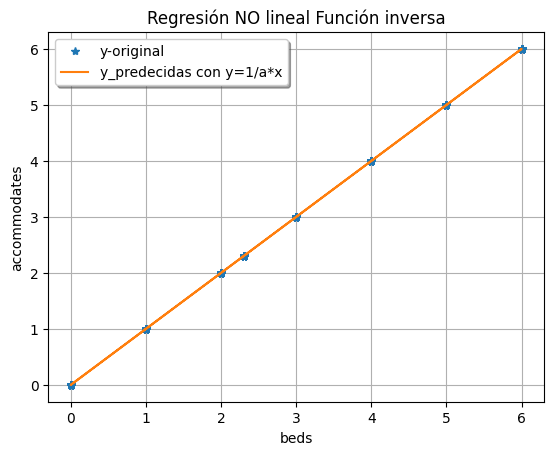

In [199]:
def  func33 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)
# Predicciones
y_pred33 = func33(x, *parametros33)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo33= r2_score(y,y_pred33)
#Calculamos el coeficiente de correlacion del modelo
R_33=np.sqrt(abs(R2_Modelo33))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred33, label='y_predecidas con y=1/a*x')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 4:

<ipython-input-200-f130af98355e>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)


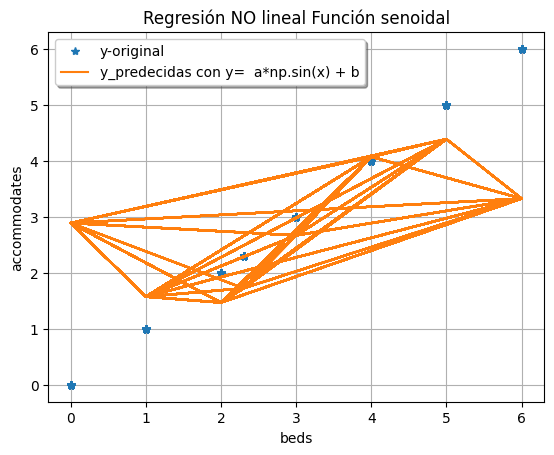

In [200]:
def  func43 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)
# Predicciones
y_pred43 = func43(x, *parametros43)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo43= r2_score(y,y_pred43)
#Calculamos el coeficiente de correlacion del modelo
R_43=np.sqrt(abs(R2_Modelo43))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred43, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 5:

<ipython-input-201-43341fe55779>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)


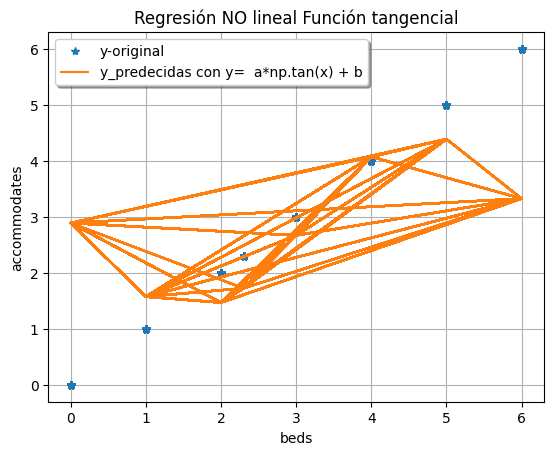

In [201]:
def  func53 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)
# Predicciones
y_pred53 = func53(x, *parametros53)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo53= r2_score(y,y_pred53)
#Calculamos el coeficiente de correlacion del modelo
R_53=np.sqrt(abs(R2_Modelo53))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred53, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 6:

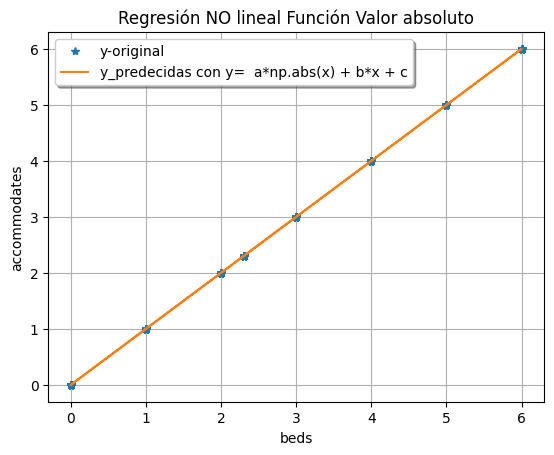

In [202]:
def  func63 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros63, covs63= curve_fit(func63 , vars_indep_3, var_dep_3)
# Predicciones
y_pred63 = func63(x, *parametros63)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo63= r2_score(y,y_pred63)
#Calculamos el coeficiente de correlacion del modelo
R_63=np.sqrt(abs(R2_Modelo63))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred63, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 7:

<ipython-input-203-6cacacccf3ff>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros73, covs73= curve_fit(func73 , vars_indep_3, var_dep_3)


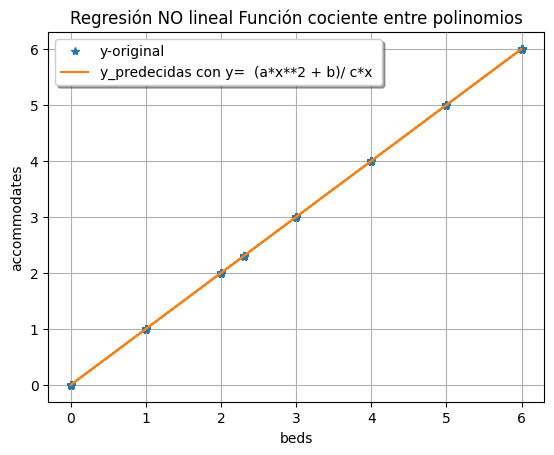

In [203]:
def  func73 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros73, covs73= curve_fit(func73 , vars_indep_3, var_dep_3)
# Predicciones
y_pred73 = func73(x, *parametros73)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo73= r2_score(y,y_pred73)
#Calculamos el coeficiente de correlacion del modelo
R_73=np.sqrt(abs(R2_Modelo73))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred73, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 8:

In [204]:
def  func83 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)
# Predicciones
y_pred83 = func83(x, *parametros83)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo83= r2_score(y,y_pred83)
#Calculamos el coeficiente de correlacion del modelo
R_83=np.sqrt(R2_Modelo83)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred83, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-204-0859195ef14e>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)


ValueError: Input contains infinity or a value too large for dtype('float64').

### Modelo 9:

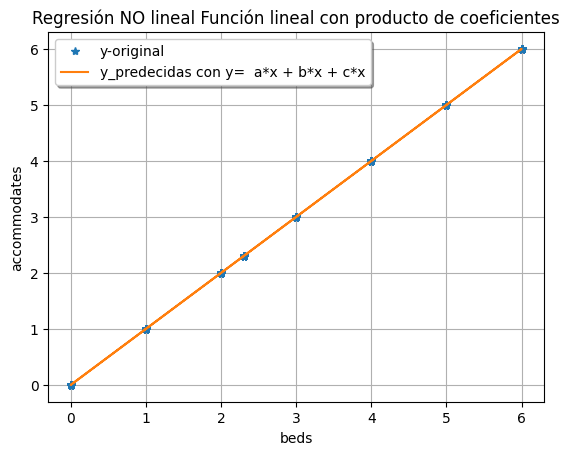

In [205]:
def  func93 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros93, covs93= curve_fit(func93 , vars_indep_3, var_dep_3)
# Predicciones
y_pred93 = func93(x, *parametros93)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo93= r2_score(y,y_pred93)
#Calculamos el coeficiente de correlacion del modelo
R_93=np.sqrt(abs(R2_Modelo93))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred93, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 10:

<ipython-input-206-2023ea34419c>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)


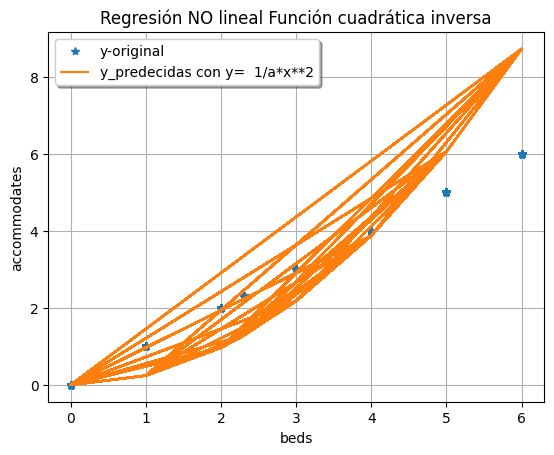

In [206]:
def  func103 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)
# Predicciones
y_pred103 = func103(x, *parametros103)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo103= r2_score(y,y_pred103)
#Calculamos el coeficiente de correlacion del modelo
R_103=np.sqrt(abs(R2_Modelo103))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred103, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

###Modelo 11:

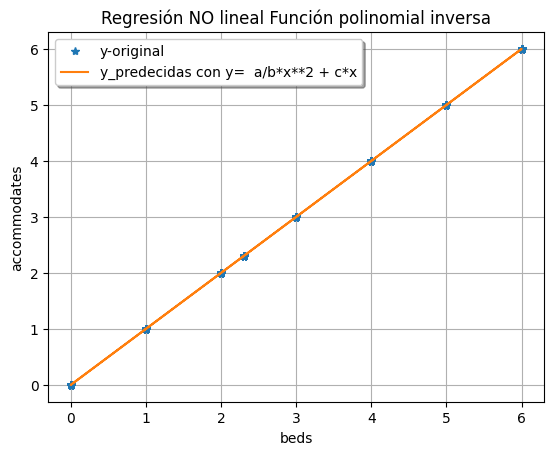

In [207]:
def  func113(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros113, covs113= curve_fit(func113, vars_indep_3, var_dep_3)
# Predicciones
y_pred113 = func113(x, *parametros113)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo113= r2_score(y,y_pred113)
#Calculamos el coeficiente de correlacion del modelo
R_113=np.sqrt(abs(R2_Modelo113))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred113, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES host_total_listings_count

In [208]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo13, R2_Modelo23,R2_Modelo33,R2_Modelo43,R2_Modelo53,R2_Modelo63,R2_Modelo73,R2_Modelo93,R2_Modelo103,R2_Modelo113],
    'Coeficiente de Correlación': [R_13, R_23,R_33,R_43,R_53,R_63,R_73,R_93,R_103,R_113]
}

# Generar con llaves
df_coef_mult3 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult3 = df_coef_mult3.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult3)
print('\nMejor Modelo:\n', df_coef_mult3.iloc[0])

Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                            1.000000   
Modelo 3: Función inversa                                               1.000000   
Modelo 6: Función Valor absoluto                                        1.000000   
Modelo 7: Función cociente entre polinomios                             1.000000   
Modelo 9: Función lineal con producto de coefic...                      1.000000   
Modelo 11: Función polinomial inversa                                   1.000000   
Modelo 2: Función Exponencial                                           1.000000   
Modelo 4: Función senoidal                                              0.541542   
Modelo 5: Función tangencial                                            0.541542   
Modelo 10: Función cuadrática inversa                                   0.534785   

         

### reviews_per_month

In [227]:
a=corr_factors1.sort_values(by='reviews_per_month', ascending=False).head(7)
a.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,price,id,host_id,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
reviews_per_month,0.079786,0.124513,0.239094,0.055206,0.054581,0.115367,0.014748,0.087342,0.088462,0.051820,...,0.526111,0.121253,0.053827,0.034716,0.045635,0.101325,0.008445,0.124633,0.006439,1.000000
number_of_reviews_ltm,0.096426,0.172431,0.318517,0.009211,0.067069,0.184456,0.130204,0.078666,0.085880,0.047255,...,1.000000,0.073444,0.004086,0.039456,0.011699,0.040199,0.017401,0.059603,0.007103,0.526111
number_of_reviews,0.086352,0.134545,0.255272,0.028349,0.037800,0.419703,0.202064,0.077136,0.079847,0.051289,...,0.555811,0.028638,0.029545,0.081598,0.036589,0.000455,0.029641,0.023342,0.018816,0.317536
host_is_superhost,0.118953,0.102737,1.000000,0.057843,0.027107,0.108749,0.059864,0.182584,0.201048,0.019642,...,0.318517,0.281324,0.237691,0.239348,0.201904,0.253286,0.099469,0.236400,0.182827,0.239094
review_scores_value,0.029917,0.015211,0.236400,0.024032,0.019264,0.069342,0.035285,0.175783,0.174591,0.028183,...,0.059603,0.669409,0.603231,0.524885,0.451084,0.484036,0.300718,1.000000,0.132199,0.124633


In [228]:
#Variable Independiente
a3=a.index[1]
a3

'number_of_reviews_ltm'

In [229]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_evaluar[a3]
var_dep_3 = data_evaluar['number_of_reviews_ltm']

In [230]:
x=vars_indep_3
y=var_dep_3

### Modelos:

### Modelo 1:

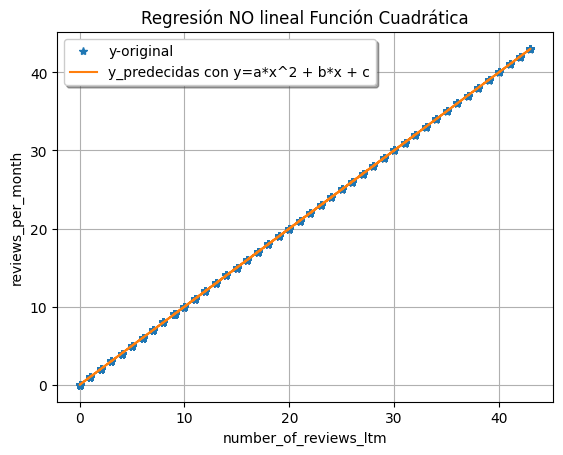

In [231]:
def  func13 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros13, covs= curve_fit(func13 , vars_indep_3, var_dep_3)
# Predicciones
y_pred13 = func13(x, *parametros13)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo13= r2_score(y,y_pred13)
#Calculamos el coeficiente de correlacion del modelo
R_13=np.sqrt(abs(R2_Modelo13))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred13, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 2:

<ipython-input-232-79ebcf21dc47>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3,maxfev = 8000)


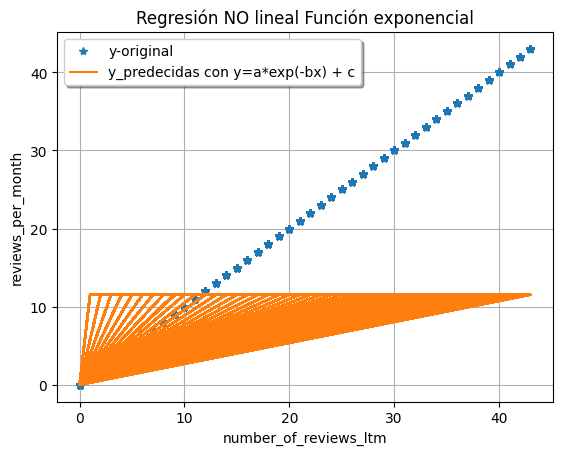

In [232]:
def  func23 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3,maxfev = 8000)
# Predicciones
y_pred23 = func23(x, *parametros23)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo23= r2_score(y,y_pred23)
#Calculamos el coeficiente de correlacion del modelo
R_23=np.sqrt(abs(R2_Modelo23))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred23, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 3:

<ipython-input-233-d48d25d10dae>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)


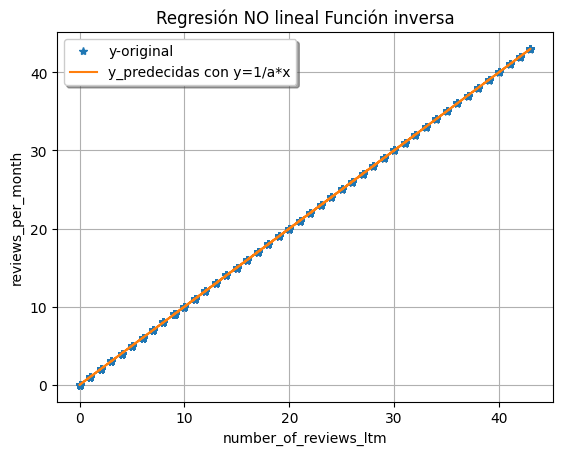

In [233]:
def  func33 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)
# Predicciones
y_pred33 = func33(x, *parametros33)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo33= r2_score(y,y_pred33)
#Calculamos el coeficiente de correlacion del modelo
R_33=np.sqrt(abs(R2_Modelo33))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred33, label='y_predecidas con y=1/a*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 4:

<ipython-input-234-0fb4392056d2>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)


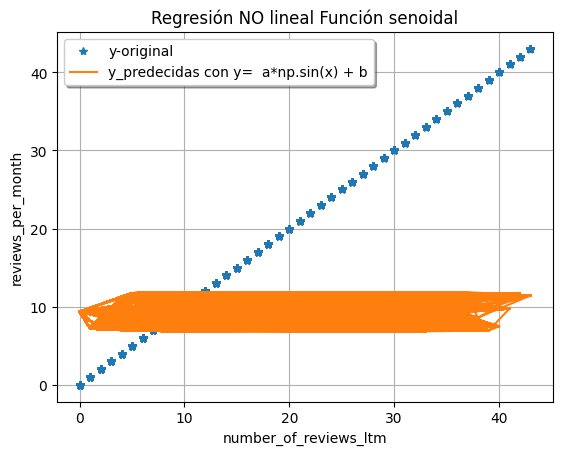

In [234]:
def  func43 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)
# Predicciones
y_pred43 = func43(x, *parametros43)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo43= r2_score(y,y_pred43)
#Calculamos el coeficiente de correlacion del modelo
R_43=np.sqrt(abs(R2_Modelo43))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred43, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 5:

<ipython-input-235-56b2575fe8a0>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)


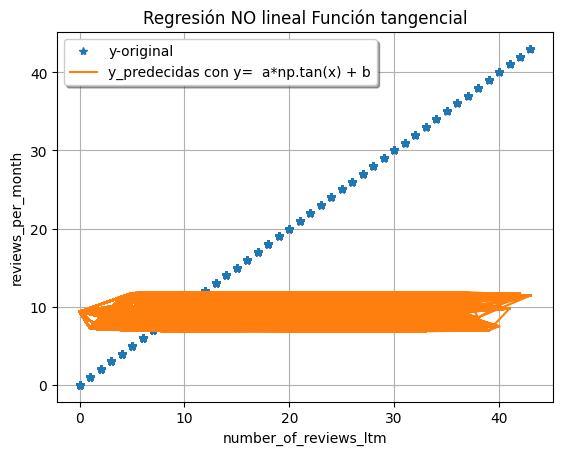

In [235]:
def  func53 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)
# Predicciones
y_pred53 = func53(x, *parametros53)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo53= r2_score(y,y_pred53)
#Calculamos el coeficiente de correlacion del modelo
R_53=np.sqrt(abs(R2_Modelo53))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred53, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 6:

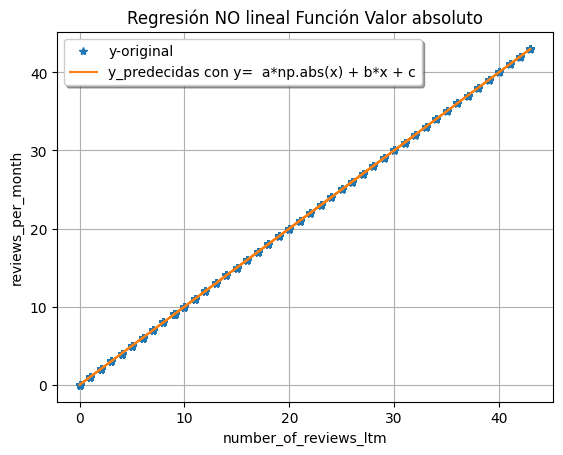

In [236]:
def  func63 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros63, covs63= curve_fit(func63 , vars_indep_3, var_dep_3)
# Predicciones
y_pred63 = func63(x, *parametros63)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo63= r2_score(y,y_pred63)
#Calculamos el coeficiente de correlacion del modelo
R_63=np.sqrt(abs(R2_Modelo63))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred63, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 7:

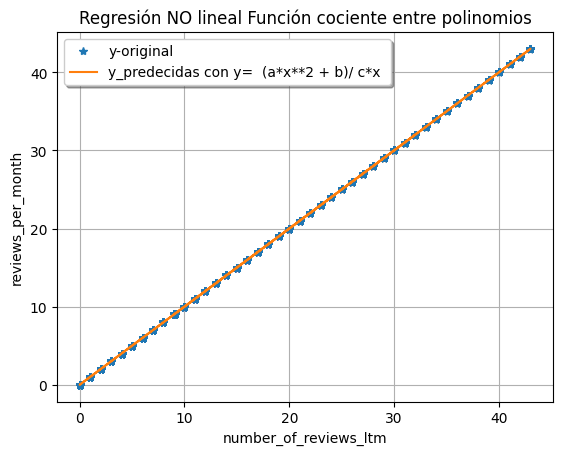

In [237]:
def  func73 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros73, covs73= curve_fit(func73 , vars_indep_3, var_dep_3)
# Predicciones
y_pred73 = func73(x, *parametros73)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo73= r2_score(y,y_pred73)
#Calculamos el coeficiente de correlacion del modelo
R_73=np.sqrt(abs(R2_Modelo73))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred73, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 8:

In [238]:
def  func83 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)
# Predicciones
y_pred83 = func83(x, *parametros83)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo83= r2_score(y,y_pred83)
#Calculamos el coeficiente de correlacion del modelo
R_83=np.sqrt(R2_Modelo83)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred83, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-238-3617b0949421>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)


ValueError: Input contains infinity or a value too large for dtype('float64').

### Modelo 9:

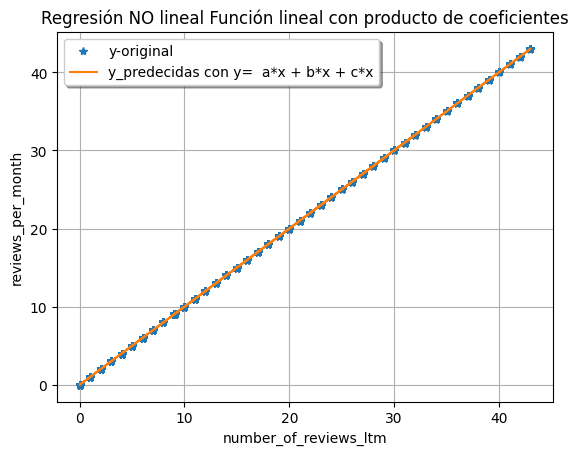

In [239]:
def  func93 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros93, covs93= curve_fit(func93 , vars_indep_3, var_dep_3)
# Predicciones
y_pred93 = func93(x, *parametros93)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo93= r2_score(y,y_pred93)
#Calculamos el coeficiente de correlacion del modelo
R_93=np.sqrt(abs(R2_Modelo93))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred93, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 10:

<ipython-input-240-67117b9381b6>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)


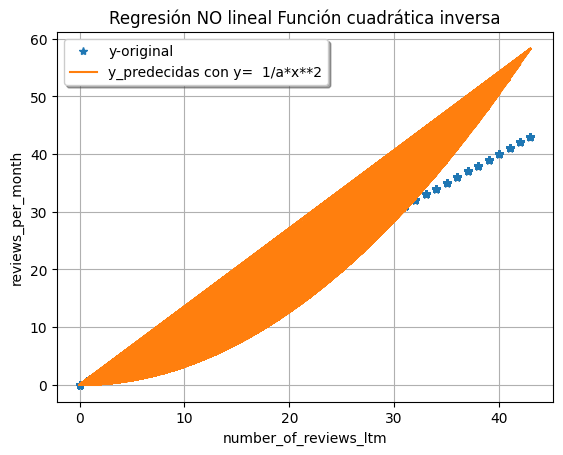

In [240]:
def  func103 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)
# Predicciones
y_pred103 = func103(x, *parametros103)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo103= r2_score(y,y_pred103)
#Calculamos el coeficiente de correlacion del modelo
R_103=np.sqrt(abs(R2_Modelo103))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred103, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 11:

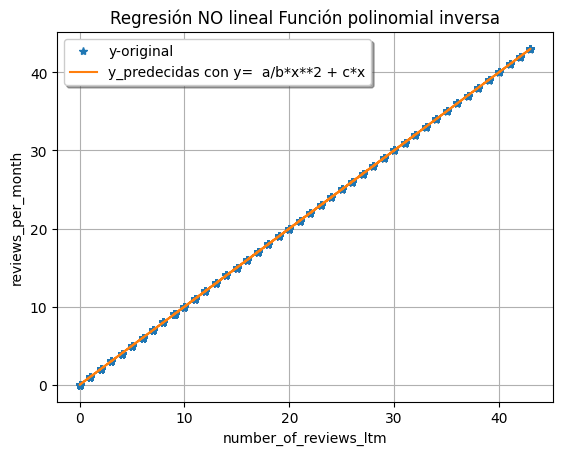

In [241]:
def  func113(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros113, covs113= curve_fit(func113, vars_indep_3, var_dep_3)
# Predicciones
y_pred113 = func113(x, *parametros113)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo113= r2_score(y,y_pred113)
#Calculamos el coeficiente de correlacion del modelo
R_113=np.sqrt(abs(R2_Modelo113))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred113, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES reviews_per_month

In [242]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo13, R2_Modelo23,R2_Modelo33,R2_Modelo43,R2_Modelo53,R2_Modelo63,R2_Modelo73,R2_Modelo93,R2_Modelo103,R2_Modelo113],
    'Coeficiente de Correlación': [R_13, R_23,R_33,R_43,R_53,R_63,R_73,R_93,R_103,R_113]
}

# Generar con llaves
df_coef_mult3 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult3 = df_coef_mult3.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult3)
print('\nMejor Modelo:\n', df_coef_mult3.iloc[0])

Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                            1.000000   
Modelo 3: Función inversa                                               1.000000   
Modelo 6: Función Valor absoluto                                        1.000000   
Modelo 7: Función cociente entre polinomios                             1.000000   
Modelo 9: Función lineal con producto de coefic...                      1.000000   
Modelo 11: Función polinomial inversa                                   1.000000   
Modelo 10: Función cuadrática inversa                                   0.783367   
Modelo 2: Función Exponencial                                           0.202530   
Modelo 4: Función senoidal                                              0.021267   
Modelo 5: Función tangencial                                            0.021267   

         

### price

In [261]:
a=corr_factors1.sort_values(by='price', ascending=False).head(7)
a.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,price,id,host_id,host_listings_count,host_total_listings_count,latitude,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
price,0.020425,0.011016,0.027107,0.075734,1.000000,0.006898,0.020043,0.038381,0.036593,0.017699,...,0.067069,0.029699,0.018531,0.030195,0.014805,0.000963,0.032043,0.019264,0.024809,0.054581
accommodates,0.010028,0.050556,0.035403,0.445294,0.127542,0.038199,0.034059,0.066601,0.079202,0.060735,...,0.025858,0.026591,0.009773,0.007002,0.021225,0.003185,0.032091,0.021776,0.029380,0.076907
beds,0.024284,0.027540,0.000511,0.280975,0.121944,0.137614,0.069985,0.044388,0.049642,0.078774,...,0.001239,0.022844,0.001219,0.008923,0.014539,0.004037,0.015057,0.025031,0.011157,0.097772
availability_30,0.066407,0.078269,0.106125,0.029729,0.089462,0.173217,0.142107,0.110755,0.104983,0.001974,...,0.174024,0.045723,0.031903,0.005663,0.046328,0.036110,0.000938,0.047446,0.026866,0.102896
availability_60,0.062527,0.049488,0.096593,0.000185,0.088614,0.195819,0.129486,0.161000,0.148774,0.025772,...,0.142814,0.047704,0.036218,0.009816,0.063389,0.043138,0.009568,0.049739,0.079568,0.061923


In [262]:
#Variable Independiente
a3=a.index[1]
a3

'accommodates'

In [263]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_evaluar[a3]
var_dep_3 = data_evaluar['accommodates']

In [264]:
x=vars_indep_3
y=var_dep_3

### Modelo:

### Modelo 1:

<ipython-input-265-59a80ab55a2d>:4: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros13, covs= curve_fit(func13 , vars_indep_3, var_dep_3)


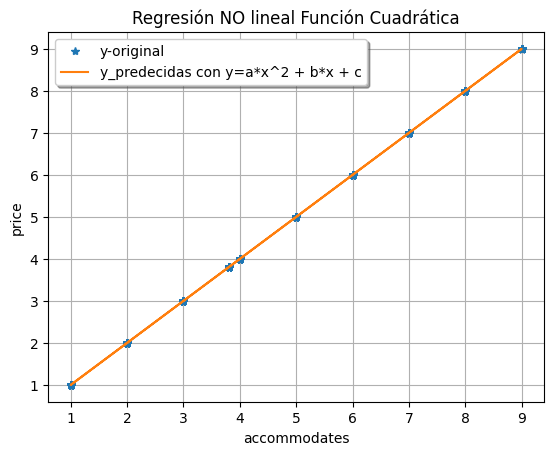

In [265]:
def  func13 (x, a, b, c):
     return a * np.square(x) + b * x + c
#Ajustamos los parámetros de la función curve_fit
parametros13, covs= curve_fit(func13 , vars_indep_3, var_dep_3)
# Predicciones
y_pred13 = func13(x, *parametros13)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo13= r2_score(y,y_pred13)
#Calculamos el coeficiente de correlacion del modelo
R_13=np.sqrt(abs(R2_Modelo13))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred13, label='y_predecidas con y=a*x^2 + b*x + c')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función Cuadrática')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 2:

<ipython-input-268-584944ff39cb>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3,maxfev = 8000)


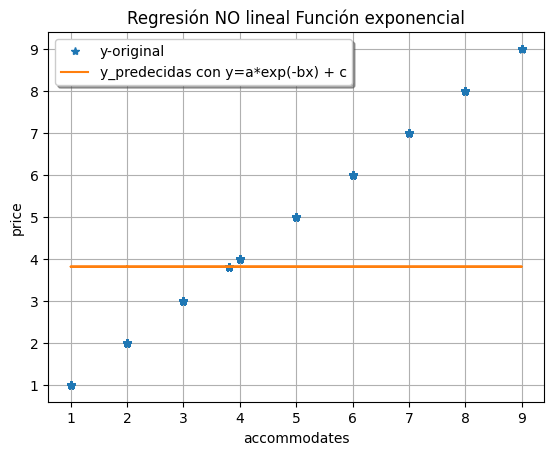

In [268]:
def  func23 (x, a, b, c):
     return a * np.exp(-b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros23, covs= curve_fit(func23 , vars_indep_3, var_dep_3,maxfev = 8000)
# Predicciones
y_pred23 = func23(x, *parametros23)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo23= r2_score(y,y_pred23)
#Calculamos el coeficiente de correlacion del modelo
R_23=np.sqrt(abs(R2_Modelo23))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred23, label='y_predecidas con y=a*exp(-bx) + c')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función exponencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 3:

<ipython-input-269-5450aca0c4a7>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)


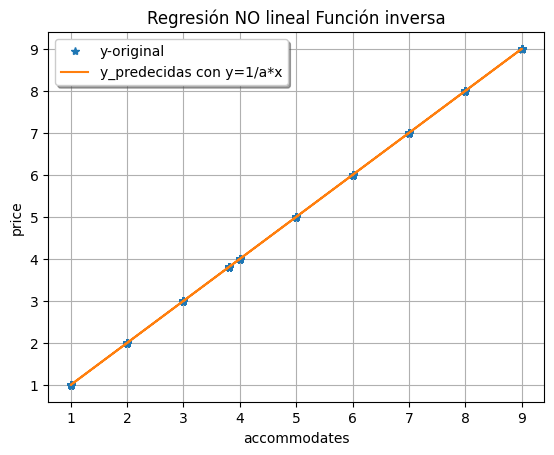

In [269]:
def  func33 (x, a, b, c):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros33, covs3= curve_fit(func33 , vars_indep_3, var_dep_3)
# Predicciones
y_pred33 = func33(x, *parametros33)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo33= r2_score(y,y_pred33)
#Calculamos el coeficiente de correlacion del modelo
R_33=np.sqrt(abs(R2_Modelo33))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred33, label='y_predecidas con y=1/a*x')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 4:

<ipython-input-270-74e271a38306>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)


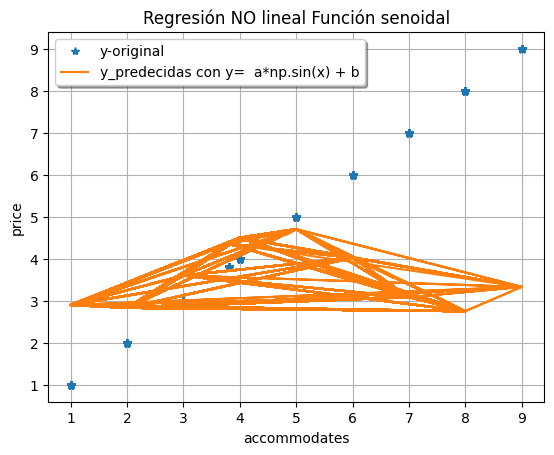

In [270]:
def  func43 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros43, covs4= curve_fit(func43 , vars_indep_3, var_dep_3)
# Predicciones
y_pred43 = func43(x, *parametros43)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo43= r2_score(y,y_pred43)
#Calculamos el coeficiente de correlacion del modelo
R_43=np.sqrt(abs(R2_Modelo43))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred43, label='y_predecidas con y=  a*np.sin(x) + b')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función senoidal')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 5:

<ipython-input-271-177f2ae964a6>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)


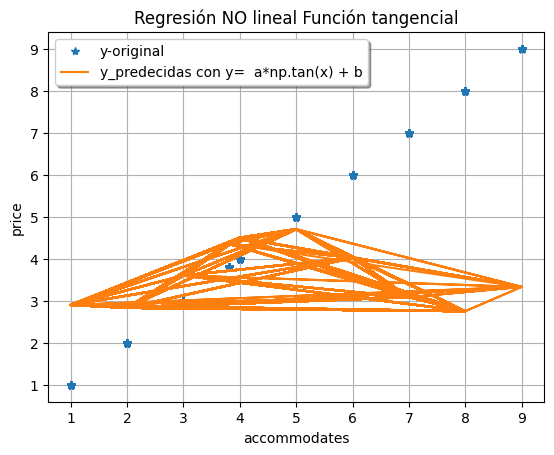

In [271]:
def  func53 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros53, covs= curve_fit(func53 , vars_indep_3, var_dep_3)
# Predicciones
y_pred53 = func53(x, *parametros53)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo53= r2_score(y,y_pred53)
#Calculamos el coeficiente de correlacion del modelo
R_53=np.sqrt(abs(R2_Modelo53))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred53, label='y_predecidas con y=  a*np.tan(x) + b')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función tangencial')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 6:

<ipython-input-272-b2d3110f399d>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros63, covs63= curve_fit(func63 , vars_indep_3, var_dep_3)


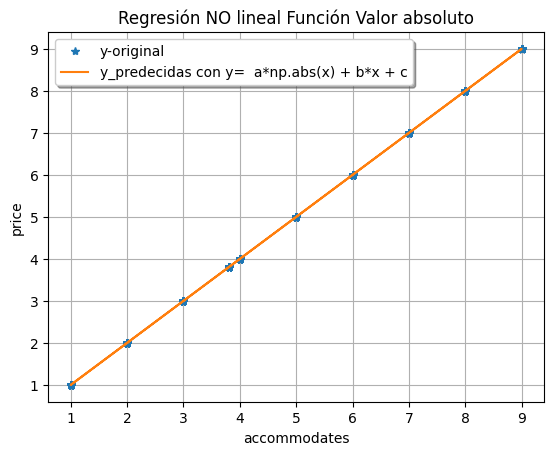

In [272]:
def  func63 (x, a, b, c):
     return  a*np.abs(x) + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros63, covs63= curve_fit(func63 , vars_indep_3, var_dep_3)
# Predicciones
y_pred63 = func63(x, *parametros63)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo63= r2_score(y,y_pred63)
#Calculamos el coeficiente de correlacion del modelo
R_63=np.sqrt(abs(R2_Modelo63))
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred63, label='y_predecidas con y=  a*np.abs(x) + b*x + c')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función Valor absoluto')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 7:

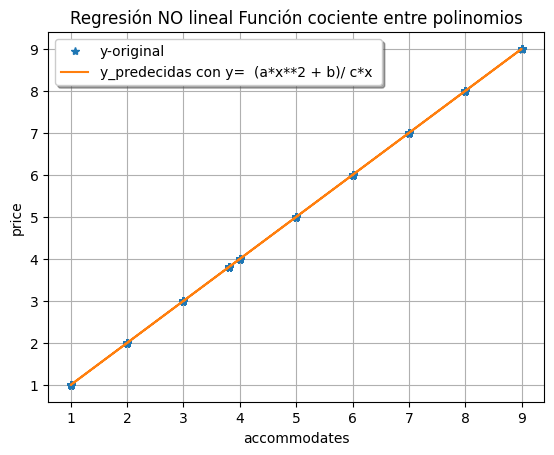

In [273]:
def  func73 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros73, covs73= curve_fit(func73 , vars_indep_3, var_dep_3)
# Predicciones
y_pred73 = func73(x, *parametros73)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo73= r2_score(y,y_pred73)
#Calculamos el coeficiente de correlacion del modelo
R_73=np.sqrt(abs(R2_Modelo73))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred73, label='y_predecidas con y=  (a*x**2 + b)/ c*x ')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función cociente entre polinomios')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 8:

<ipython-input-274-21662b039beb>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)


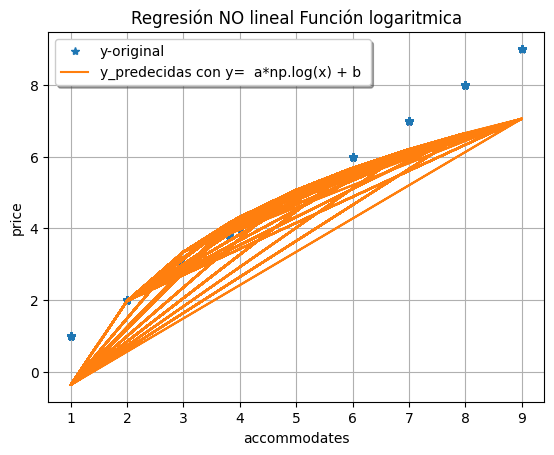

In [274]:
def  func83 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros83, covs83= curve_fit(func83 , vars_indep_3, var_dep_3)
# Predicciones
y_pred83 = func83(x, *parametros83)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo83= r2_score(y,y_pred83)
#Calculamos el coeficiente de correlacion del modelo
R_83=np.sqrt(R2_Modelo83)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred83, label='y_predecidas con y=  a*np.log(x) + b ')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función logaritmica')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 9:

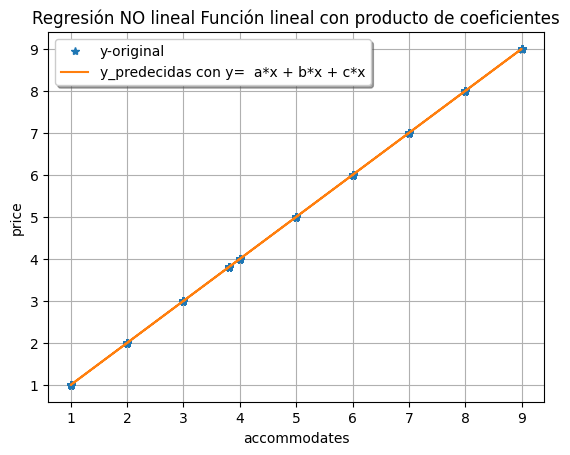

In [275]:
def  func93 (x, a, b, c):
     return a*x + b*x + c*x

#Ajustamos los parámetros de la función curve_fit
parametros93, covs93= curve_fit(func93 , vars_indep_3, var_dep_3)
# Predicciones
y_pred93 = func93(x, *parametros93)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo93= r2_score(y,y_pred93)
#Calculamos el coeficiente de correlacion del modelo
R_93=np.sqrt(abs(R2_Modelo93))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred93, label='y_predecidas con y=  a*x + b*x + c*x')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función lineal con producto de coeficientes')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 10:

<ipython-input-276-c117f9692669>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)


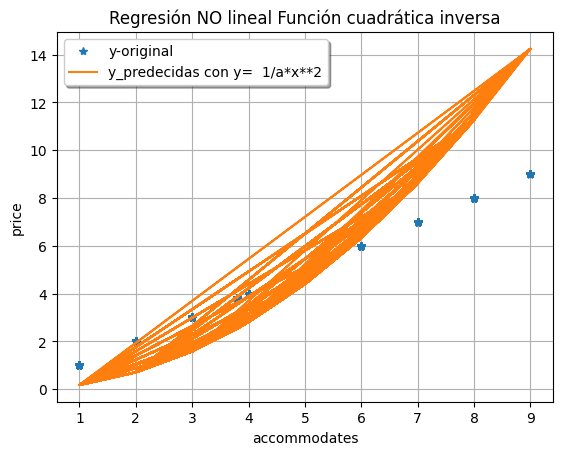

In [276]:
def  func103 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros103, covs103= curve_fit(func103 , vars_indep_3, var_dep_3)
# Predicciones
y_pred103 = func103(x, *parametros103)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo103= r2_score(y,y_pred103)
#Calculamos el coeficiente de correlacion del modelo
R_103=np.sqrt(abs(R2_Modelo103))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred103, label='y_predecidas con y=  1/a*x**2')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función cuadrática inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Modelo 11:

<ipython-input-277-24521062ab2a>:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros113, covs113= curve_fit(func113, vars_indep_3, var_dep_3)


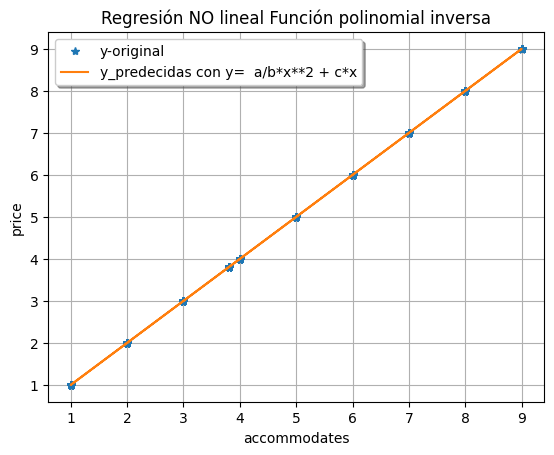

In [277]:
def  func113(x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros113, covs113= curve_fit(func113, vars_indep_3, var_dep_3)
# Predicciones
y_pred113 = func113(x, *parametros113)
#Calculamos el coeficiente de determinación del modelo
R2_Modelo113= r2_score(y,y_pred113)
#Calculamos el coeficiente de correlacion del modelo
R_113=np.sqrt(abs(R2_Modelo113))

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, '*', label='y-original')
plt.plot(x,y_pred113, label='y_predecidas con y=  a/b*x**2 + c*x')
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Regresión NO lineal Función polinomial inversa')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Tabla de COEFICIENTES price

In [279]:
# Preparar datos del Frame
coef_data = {
    'Coeficiente de Determinación': [R2_Modelo13, R2_Modelo23,R2_Modelo33,R2_Modelo43,R2_Modelo53,R2_Modelo63,R2_Modelo73,R2_Modelo83,R2_Modelo93,R2_Modelo103,R2_Modelo113],
    'Coeficiente de Correlación': [R_13, R_23,R_33,R_43,R_53,R_63,R_73,R_83,R_93,R_103,R_113]
}

# Generar con llaves
df_coef_mult3 = pd.DataFrame(coef_data, index=['Modelo 1: Función Cuadrática', 'Modelo 2: Función Exponencial','Modelo 3: Función inversa','Modelo 4: Función senoidal','Modelo 5: Función tangencial','Modelo 6: Función Valor absoluto','Modelo 7: Función cociente entre polinomios','Modelo 8: Función logarítmica','Modelo 9: Función lineal con producto de coeficientes', "Modelo 10: Función cuadrática inversa",'Modelo 11: Función polinomial inversa'])
df_coef_mult3 = df_coef_mult3.sort_values(by='Coeficiente de Determinación', ascending=False)
a.head()
print('Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE\n\n', df_coef_mult3)
print('\nMejor Modelo:\n', df_coef_mult3.iloc[0])

Tabla de correlaciones Host_Response_Rate REGRESIÓN NO MULTIPLE

                                                     Coeficiente de Determinación  \
Modelo 1: Función Cuadrática                                        1.000000e+00   
Modelo 3: Función inversa                                           1.000000e+00   
Modelo 6: Función Valor absoluto                                    1.000000e+00   
Modelo 7: Función cociente entre polinomios                         1.000000e+00   
Modelo 9: Función lineal con producto de coefic...                  1.000000e+00   
Modelo 11: Función polinomial inversa                               1.000000e+00   
Modelo 8: Función logarítmica                                       9.252614e-01   
Modelo 10: Función cuadrática inversa                               3.791063e-01   
Modelo 4: Función senoidal                                          2.064621e-01   
Modelo 5: Función tangencial                                        2.064621e-01   
Modelo 2: 